<a href="https://colab.research.google.com/github/angelsmreyes/parkinson/blob/main/Parkinson_drawings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from skimage.transform import resize
from skimage.io import imread

plt.style.use('fivethirtyeight')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [2]:
dir = '/content/drive/MyDrive/drawings/spiral/training'

In [3]:
categories = ['healthy', 'parkinson']
label = []
predictors = []

path = os.path.join(dir, i) se le agrega a dir el nombre de la carpeta a usar dentro de la lista categories

img in os.listdir(path) se listan todos los archivos dentro del directrio

In [4]:
for i in categories:
  path = os.path.join(dir, i)
  print(path)
  for img in os.listdir(path):
    image = imread(os.path.join(path, img)) # la imagen es un arreglo
    image_resize = resize(image, (256, 256, 3)) # 
    predictors.append(image_resize.flatten())
    label.append(categories.index(i)) 

/content/drive/MyDrive/drawings/spiral/training/healthy
/content/drive/MyDrive/drawings/spiral/training/parkinson


In [5]:
pred = np.array(predictors)

In [6]:
spiral_pd = pd.DataFrame(pred)

In [7]:
spiral_pd.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,196568,196569,196570,196571,196572,196573,196574,196575,196576,196577,196578,196579,196580,196581,196582,196583,196584,196585,196586,196587,196588,196589,196590,196591,196592,196593,196594,196595,196596,196597,196598,196599,196600,196601,196602,196603,196604,196605,196606,196607
0,0.929412,0.927451,0.902614,0.925490,0.925490,0.984314,0.929412,0.929412,0.942484,0.917647,0.917647,0.940523,0.933333,0.933333,0.943137,0.937255,0.937255,0.943791,0.925490,0.925490,0.941830,0.945098,0.945098,0.945098,0.937255,0.937255,0.943791,0.905882,0.905882,0.938562,0.945098,0.945098,0.945098,0.941176,0.941176,0.944444,0.909804,0.909804,0.939216,0.921569,...,0.953595,0.913725,0.913725,0.956209,0.901961,0.901961,0.954248,0.894118,0.894118,0.952941,0.917647,0.917647,0.956863,0.905882,0.905882,0.954902,0.870588,0.870588,0.949020,0.913725,0.913725,0.956209,0.909804,0.909804,0.955556,0.909804,0.909804,0.955556,0.929412,0.929412,0.958824,0.886275,0.886275,0.951634,0.874510,0.874510,0.975817,0.913725,0.913725,0.913725
1,0.949020,0.949020,0.949020,0.941176,0.941176,0.941176,0.937255,0.937255,0.937255,0.941176,0.941176,0.941176,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255,0.949020,0.949020,0.949020,0.952941,0.952941,0.952941,0.952941,0.952941,0.952941,0.921569,0.921569,0.921569,0.913725,0.913725,0.913725,0.909804,0.909804,0.909804,0.921569,0.921569,0.921569,0.945098,...,0.925490,0.941176,0.941176,0.941176,0.949020,0.949020,0.949020,0.941176,0.941176,0.941176,0.937255,0.937255,0.937255,0.945098,0.945098,0.945098,0.917647,0.917647,0.917647,0.933333,0.933333,0.933333,0.952941,0.952941,0.952941,0.937255,0.937255,0.937255,0.949020,0.949020,0.949020,0.929412,0.929412,0.929412,0.913725,0.913725,0.913725,0.949020,0.949020,0.949020
2,0.941176,0.941176,0.941176,0.937255,0.937255,0.937255,0.945098,0.945098,0.945098,0.941176,0.941176,0.941176,0.968627,0.968627,0.968627,0.972549,0.972549,0.972549,0.976471,0.976471,0.976471,0.964706,0.964706,0.964706,0.968627,0.968627,0.968627,0.949020,0.949020,0.949020,0.952941,0.952941,0.952941,0.968627,0.968627,0.968627,0.964706,0.964706,0.964706,0.949020,...,0.960784,0.941176,0.941176,0.941176,0.949020,0.949020,0.949020,0.976471,0.976471,0.976471,0.964706,0.964706,0.964706,0.933333,0.933333,0.933333,0.952941,0.952941,0.952941,0.945098,0.945098,0.945098,0.949020,0.949020,0.949020,0.949020,0.949020,0.949020,0.937255,0.937255,0.937255,0.952941,0.952941,0.952941,0.921569,0.921569,0.921569,0.949020,0.949020,0.949020


In [8]:
spiral_pd['status'] = label

In [9]:
spiral_pd.tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,196569,196570,196571,196572,196573,196574,196575,196576,196577,196578,196579,196580,196581,196582,196583,196584,196585,196586,196587,196588,196589,196590,196591,196592,196593,196594,196595,196596,196597,196598,196599,196600,196601,196602,196603,196604,196605,196606,196607,status
70,0.929412,0.929412,0.929412,0.941176,0.941176,0.941176,0.945098,0.945098,0.945098,0.941176,0.941176,0.941176,0.925490,0.925490,0.925490,0.941176,0.941176,0.941176,0.929412,0.929412,0.929412,0.945098,0.945098,0.945098,0.952941,0.952941,0.952941,0.964706,0.964706,0.964706,0.952941,0.952941,0.952941,0.937255,0.937255,0.937255,0.917647,0.917647,0.917647,0.937255,...,0.925490,0.925490,0.925490,0.933333,0.933333,0.933333,0.917647,0.917647,0.917647,0.929412,0.929412,0.929412,0.956863,0.956863,0.956863,0.949020,0.949020,0.949020,0.921569,0.921569,0.921569,0.917647,0.917647,0.917647,0.909804,0.909804,0.909804,0.917647,0.917647,0.917647,0.913725,0.913725,0.913725,0.901961,0.901961,0.901961,0.913725,0.913725,0.913725,1
71,0.937255,0.937255,0.937255,0.941176,0.941176,0.941176,0.937255,0.937255,0.937255,0.933333,0.933333,0.933333,0.945098,0.945098,0.945098,0.960784,0.960784,0.960784,0.929412,0.929412,0.929412,0.925490,0.925490,0.925490,0.917647,0.917647,0.917647,0.933333,0.933333,0.933333,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.945098,0.945098,0.945098,0.937255,...,0.964706,0.964706,0.964706,0.945098,0.945098,0.945098,0.933333,0.933333,0.933333,0.929412,0.929412,0.929412,0.937255,0.937255,0.937255,0.917647,0.917647,0.917647,0.909804,0.909804,0.909804,0.964706,0.964706,0.964706,0.945098,0.945098,0.945098,0.921569,0.921569,0.921569,0.933333,0.933333,0.933333,0.949020,0.949020,0.949020,0.937255,0.937255,0.937255,1


### Spliting the training data

In [10]:
y = spiral_pd.status

In [11]:
X = spiral_pd.drop(columns='status', axis=1).copy()

### Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [14]:
print('Dimensions of train: ', X_train.shape, y_train.shape)
print('\n-----------\n')
print('Dimensions of test: ', X_test.shape, y_test.shape)

Dimensions of train:  (61, 196608) (61,)

-----------

Dimensions of test:  (11, 196608) (11,)


### SVM Model

In [15]:
from sklearn.svm import SVC

In [16]:
clf = SVC()

In [17]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_pred = clf.predict(X_test)

**Model evaluation**

In [19]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [20]:
print(accuracy_score(y_pred, y_test))

0.5454545454545454


In [21]:
metrics.confusion_matrix(y_test, y_pred)

array([[2, 5],
       [0, 4]])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.44      1.00      0.62         4

    accuracy                           0.55        11
   macro avg       0.72      0.64      0.53        11
weighted avg       0.80      0.55      0.51        11



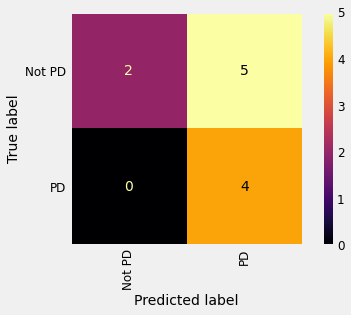

In [70]:
metrics.plot_confusion_matrix(clf, X_test, y_test,
                              display_labels=['Not PD', 'PD'],
                              xticks_rotation='vertical',
                              cmap='inferno')

plt.grid(b=None)

### Hyperparameter tuning 

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
grid = GridSearchCV(clf, {
    'gamma': ['auto', 'scale'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[0.1, 1, 4, 8, 10, 20, 100]
}, cv=5, scoring='accuracy')

In [26]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 4, 8, 10, 20, 100],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [27]:
grid.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}

In [28]:
grid.best_score_

0.8051282051282052

In [29]:
df_cv = pd.DataFrame(grid.cv_results_)

In [30]:
df_cv.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,1.125398,0.014268,0.363059,0.008016,4,scale,poly,"{'C': 4, 'gamma': 'scale', 'kernel': 'poly'}",0.692308,0.75,0.916667,0.833333,0.833333,0.805128,0.0772,1
53,1.106880,0.009312,0.361473,0.003636,100,scale,poly,"{'C': 100, 'gamma': 'scale', 'kernel': 'poly'}",0.692308,0.75,0.916667,0.833333,0.833333,0.805128,0.0772,1
5,1.110602,0.008403,0.360464,0.005430,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.692308,0.75,0.916667,0.833333,0.833333,0.805128,0.0772,1
29,1.099618,0.010960,0.362642,0.005431,8,scale,poly,"{'C': 8, 'gamma': 'scale', 'kernel': 'poly'}",0.692308,0.75,0.916667,0.833333,0.833333,0.805128,0.0772,1
45,1.105288,0.005628,0.365612,0.007116,20,scale,poly,"{'C': 20, 'gamma': 'scale', 'kernel': 'poly'}",0.692308,0.75,0.916667,0.833333,0.833333,0.805128,0.0772,1


**Evaluating the model with the optimal hyperparameters**

In [55]:
clf2 = SVC(C=0.1, gamma='scale', kernel='poly')

In [56]:
clf2.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
y_pred_n = clf2.predict(X_test)

In [58]:
print(accuracy_score(y_test, y_pred_n))

0.7272727272727273


In [59]:
print(classification_report(y_test, y_pred_n))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.57      1.00      0.73         4

    accuracy                           0.73        11
   macro avg       0.79      0.79      0.73        11
weighted avg       0.84      0.73      0.73        11



In [60]:
y_pred_n_train = clf2.predict(X_train)

In [61]:
print(accuracy_score(y_train, y_pred_n_train))

1.0


In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

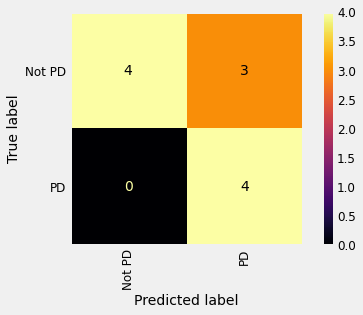

In [71]:
metrics.plot_confusion_matrix(clf2, X_test, y_test,
                              display_labels=['Not PD', 'PD'],
                              xticks_rotation='vertical',
                              cmap='inferno')
plt.grid(b=None)

### ROC

In [64]:
from sklearn.metrics import plot_roc_curve

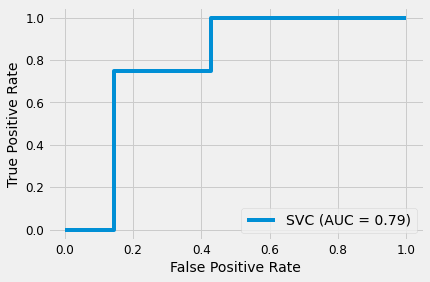

In [69]:
plot_roc_curve(clf2, X_test, y_test)